In [1]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.load("traffic.npz")
img_train = data['img_train']
img_test  = data['img_test']
lab_train = data['lab_train']
lab_test  = data['lab_test']
lab_txt   = data['lab_txt']

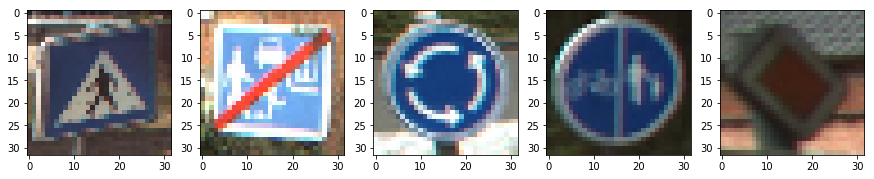

In [3]:
f,ax = subplots(1,5)
f.set_size_inches(15,5)

ind = np.random.randint(len(img_train),size=5)
for i in range(5):
    ax[i].imshow(img_train[ind[i]])

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32,32,3)),
  tf.keras.layers.Conv2D(32,(5,5),activation=tf.nn.relu),
  tf.keras.layers.Conv2D(32,(5,5),activation=tf.nn.relu),
  tf.keras.layers.Conv2D(32,(5,5),activation=tf.nn.relu),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation=tf.nn.relu),
  tf.keras.layers.Dense(62,activation=tf.nn.softmax)
])

In [6]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'],optimizer='adam')

In [7]:
model.fit(img_train, lab_train, epochs=20)

Epoch 1/20
4575/4575 [==============================] - 2s 491us/sample - loss: 1.4319 - acc: 0.6920
Epoch 2/20
4575/4575 [==============================] - 1s 276us/sample - loss: 0.2574 - acc: 0.9401
Epoch 3/20
4575/4575 [==============================] - 1s 282us/sample - loss: 0.1136 - acc: 0.9725
Epoch 4/20
4575/4575 [==============================] - 1s 289us/sample - loss: 0.0605 - acc: 0.9854
Epoch 5/20
4575/4575 [==============================] - 1s 295us/sample - loss: 0.0628 - acc: 0.9862
Epoch 6/20
4575/4575 [==============================] - 1s 282us/sample - loss: 0.0216 - acc: 0.9952
Epoch 7/20
4575/4575 [==============================] - 1s 276us/sample - loss: 0.0122 - acc: 0.9972
Epoch 8/20
4575/4575 [==============================] - 1s 279us/sample - loss: 0.0297 - acc: 0.9937
Epoch 9/20
4575/4575 [==============================] - 1s 284us/sample - loss: 0.0656 - acc: 0.9816
Epoch 10/20
4575/4575 [==============================] - 1s 292us/sample - loss: 0.0259 - a

In [8]:
score = model.evaluate(img_test, lab_test)
print('Accuracy: {:.2%}'.format(score[1]))

2520/2520 [==============================] - 0s 144us/sample - loss: 0.4564 - acc: 0.9516
Accuracy: 95.16%


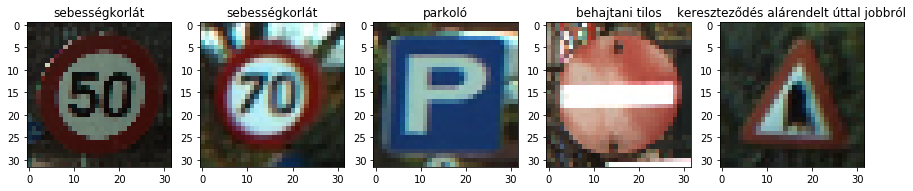

In [9]:
f,ax = subplots(1,5)
f.set_size_inches(15,5)

ind = np.random.randint(len(img_test),size=5)
lab = np.argmax(model.predict(img_test[ind]),axis=1)
for i in range(5):
    ax[i].imshow(img_test[ind[i]])
    ax[i].set_title('{}'.format(lab_txt[lab[i]]))